# Labo 2

In [1]:
import cv2 as cv
import numpy as np
import seaborn as sns

In [2]:
img = cv.imread("../afbeeldingen/building.png")
img.shape

(467, 467, 3)

### Assignment 1 Use the Sobel operator to calculate the horizontal first-order derivative. Ensure you capture and visualize the negative filter response values by using appropriate datatypes.

In [3]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = gray.astype(np.float32)
grad_x = cv.Sobel(gray, -1, 1, 0, ksize=3, scale=1, delta=1, borderType=cv.BORDER_DEFAULT)
grad_x.shape

(467, 467)

In [4]:
grad_x = np.abs(grad_x)
grad_x = np.clip(grad_x, 0, 255)
grad_x = grad_x.astype(np.uint8)

In [5]:
cv.imshow("Horizontal first-order", grad_x)
cv.waitKey(0)
cv.destroyAllWindows()

### Assignment 2 Create a 15x15 DoG filter using the workflow below

xdv [0.00410725 0.01074341 0.02423753 0.04716174 0.07914918 0.11456666
 0.14302942 0.15400959 0.14302942 0.11456666 0.07914918 0.04716174
 0.02423753 0.01074341 0.00410725]


<AxesSubplot:>

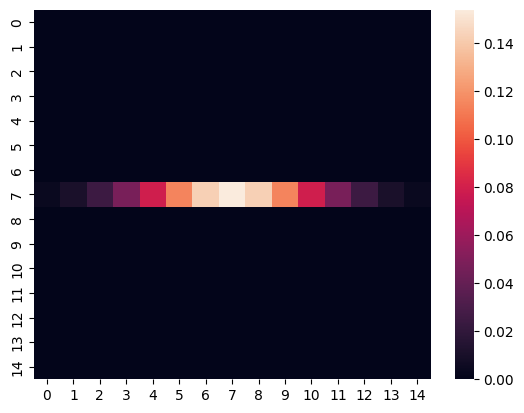

In [7]:
dog = np.zeros((15, 15), np.float32)
ksize = 15
sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8 # ~2.67, this formula is from the documentation
kernel = cv.getGaussianKernel(ksize, sigma)
kernel = kernel.reshape((15,)) # making it vertical
print("xdv", kernel)
dog[7] = kernel
kernel2 = cv.getGaussianKernel(ksize, sigma-1)
sns.heatmap(dog)

<AxesSubplot:>

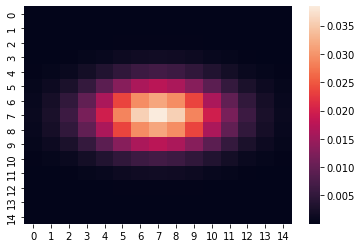

In [7]:
dog = cv.filter2D(dog, -1, kernel2)
sns.heatmap(dog)

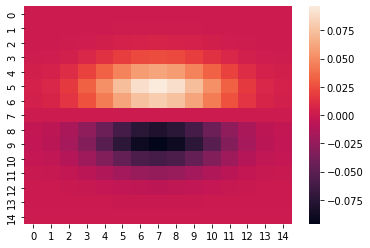

In [8]:
dog = cv.Sobel(dog, -1, 0, 1, ksize=3, borderType=cv.BORDER_DEFAULT)
sns.heatmap(dog)
rotation = cv.getRotationMatrix2D((7, 7), 45, 1)

<AxesSubplot:>

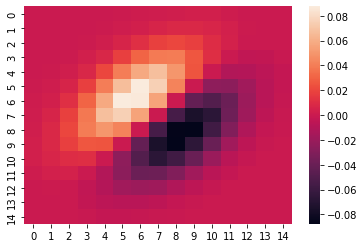

In [9]:
dog = cv.warpAffine(dog, rotation, (15, 15))
sns.heatmap(dog)

### Assignment 3 Filter rays.png with a well chosen DoG filter so that in the resulting image, the edges of the yellow strips stand out (you will need to take the absolute value of the responses).

In [10]:
img = cv.imread("Images/rays.png")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

<AxesSubplot:>

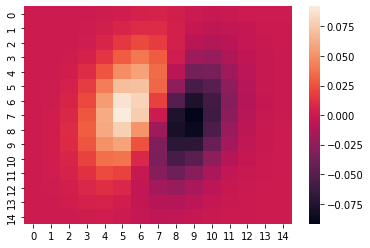

In [11]:
dog = np.zeros((15, 15), np.float32)
ksize = 15
sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8
kernel = cv.getGaussianKernel(ksize, sigma)
kernel = kernel.reshape((15,))
dog[7] = kernel
kernel2 = cv.getGaussianKernel(ksize, sigma-1)
dog = cv.filter2D(dog, -1, kernel2)
dog = cv.Sobel(dog, -1, 0, 1, ksize=3, borderType=cv.BORDER_DEFAULT)
rotation = cv.getRotationMatrix2D((7, 7), 75, 1)
dog = cv.warpAffine(dog, rotation, (15, 15))
sns.heatmap(dog)

In [12]:
res = cv.filter2D(gray.astype(np.float32), -1, dog, borderType=cv.BORDER_DEFAULT)
res = np.abs(res)
res = np.clip(res, 0, 255)
res = res.astype(np.uint8)
res

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
cv.imshow("Yellow filter", res)
cv.waitKey(0)
cv.destroyAllWindows()

### Question 1 What happens when your filter goes "across the border" of the image?
The function appends outlier pixel values according to the specified border mode. Each border mode proposes a way to choose how to copy pixels from the original image to the border. For example BORDER_DEFAULT will add pixels, but reflected like this: gfedcb|abcdefgh|gfedcba. 

In [14]:
cv.BORDER_DEFAULT

4

### Assignment 4 Apply Canny edge detection with thresholds chosen so that the edges of all strips are detected.

In [15]:
edges = cv.Canny(img, 100, 200)

In [16]:
cv.imshow("Canny edge", edges)
cv.waitKey(0)
cv.destroyAllWindows()

### Assignment 5 Apply Canny edge detection so that you get the four edges of the painting, and as few other edges as possible. It is inevitable that you find other edges however.

In [27]:
img = cv.imread("Images/painting4.jpg")
blur = cv.blur(img,(5,5))
edges = cv.Canny(blur, 130, 256)

In [28]:
cv.imshow("Canny edge on painting", edges)
cv.waitKey(0)
cv.destroyAllWindows()

### Assignment 6 Apply HoughLines to the result of Assignment 5 and visualize the lines on the original image (use the line function). It is normal too get too many lines, since you cannot get the Canny result perfect.

In [29]:
import math
lines = cv.HoughLines(edges, 1, np.pi/180, 150, None, 0, 0)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(img, pt1, pt2, (0,255,255), 3, cv.LINE_AA)

In [31]:
cv.imshow("HoughLines on painting", img)
cv.waitKey(0)
cv.destroyAllWindows()

### Assignment 7 Detect Harris corners in shot1.png and shot2.png and visualize them side by side.

In [21]:
shot1 = cv.imread("Images/shot1.png")
shot2 = cv.imread("Images/shot2.png")

gray1 = cv.cvtColor(shot1, cv.COLOR_BGR2GRAY)
gray1 = np.float32(gray1)
dst1 = cv.cornerHarris(gray1,2,3,0.04)

gray2 = cv.cvtColor(shot2, cv.COLOR_BGR2GRAY)
gray2 = np.float32(gray2)
dst2 = cv.cornerHarris(gray2,2,3,0.04)

# Threshold for an optimal value, it may vary depending on the image.
shot1[dst1>0.01*dst1.max()]=[0,0,255]
shot2[dst2>0.01*dst2.max()]=[0,0,255]

In [22]:
cv.imshow("Corner harris shot1", shot1)
cv.imshow("Corner harris shot2", shot2)
cv.waitKey(0)
cv.destroyAllWindows()

### Question 2 Name two kinds of problems you foresee in trying to match these corners.
- Paralax
- Mismatch distances

### Assignment 8 Detect ORB features in each of the two original images, calculate the ORB descriptors for them, and match the descriptors between the two images. Visualize the 32 best matches.

In [24]:
shot1 = cv.imread("Images/shot1.png")
shot2 = cv.imread("Images/shot2.png")

orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(shot1,None)
kp2, des2 = orb.detectAndCompute(shot2,None)

In [25]:
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv.drawMatches(shot1,kp1,shot2,kp2,matches[:32],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

In [26]:
cv.imshow("ORB features", img3)
cv.waitKey(0)
cv.destroyAllWindows()